<a href="https://colab.research.google.com/github/guru2609p/Hackathon-1/blob/main/Hackathon_1_Guruprakash.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/hacktrain.csv")
df

,Unnamed: 0,ID,class,20150720_N,20150602_N,20150517_N,20150501_N,20150415_N,20150330_N,20150314_N,...,20140610_N,20140525_N,20140509_N,20140423_N,20140407_N,20140322_N,20140218_N,20140202_N,20140117_N,20140101_N
0,0,1,water,637.5950,658.668,-1882.030,-1924.36,997.904,-1739.990,630.087,...,NaN,-1043.160,-1942.490,267.138,NaN,NaN,211.328,-2203.020,-1180.19,433.906
1,1,2,water,634.2400,593.705,-1625.790,-1672.32,914.198,-692.386,707.626,...,NaN,-933.934,-625.385,120.059,364.858,476.972,220.878,-2250.000,-1360.56,524.075
2,3,4,water,58.0174,-1599.160,NaN,-1052.63,NaN,-1564.630,NaN,...,-1025.880,368.622,NaN,-1227.800,304.621,NaN,369.214,-2202.120,NaN,-1343.550
3,4,5,water,72.5180,NaN,380.436,-1256.93,515.805,-1413.180,-802.942,...,-1813.950,155.624,NaN,-924.073,432.150,282.833,298.320,-2197.360,NaN,-826.727
4,7,8,water,1136.4400,NaN,NaN,1647.83,1935.800,NaN,2158.980,...,1535.000,1959.430,-279.317,-384.915,-113.406,1020.720,1660.650,-116.801,-568.05,-1357.140
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,10537,10538,impervious,1207.7000,984.620,NaN,1166.25,937.478,1072.700,823.896,...,1117.740,1176.600,1044.110,NaN,369.082,465.843,362.882,979.795,NaN,433.659
7996,10538,10539,impervious,2170.3500,1419.720,1361.000,1478.71,983.911,1262.110,1422.860,...,984.634,2128.970,1379.660,NaN,762.633,485.204,446.724,771.747,1589.06,506.936
7997,10541,10542,impervious,1895.6800,1454.740,NaN,1033.56,1930.380,1057.150,1471.600,...,888.408,2093.020,1232.110,1190.830,1441.460,1170.880,1095.000,1818.650,2501.72,1247.770
7998,10542,10543,impervious,3465.7400,1283.320,413.412,4391.05,1146.820,4473.050,1614.750,...,5833.760,4047.320,4515.800,433.177,277.296,744.143,NaN,3759.710,NaN,388.346


In [ ]:
df.isnull().sum()

,0
Unnamed: 0,0
ID,0
class,0
20150720_N,560
20150602_N,1200
20150517_N,800
20150501_N,960
20150415_N,480
20150330_N,1120
20150314_N,720


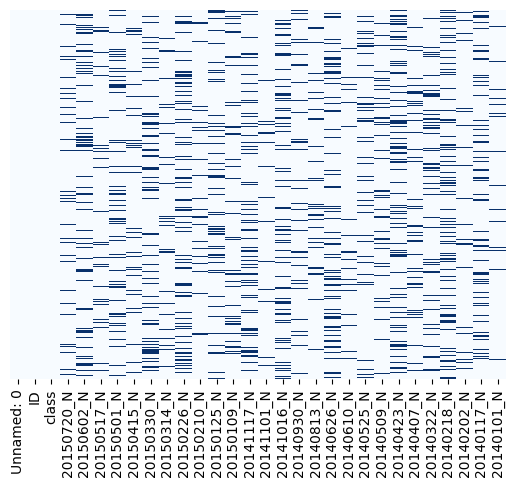

In [ ]:
feature_cols = [col for col in df.columns if col not in ['class']]
target_cols = ['class']

sns.heatmap(df.isnull(), cmap='Blues', cbar=False, yticklabels=False, xticklabels=df.columns);

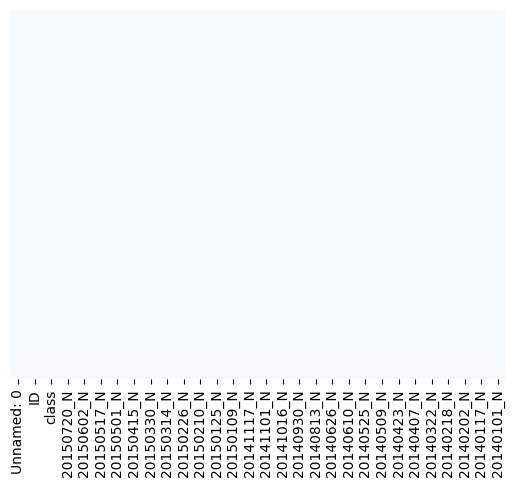

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from sklearn.impute import MissingIndicator

from sklearn.impute import KNNImputer

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

df_iterative_imputer = df.copy()

itr_imputer = IterativeImputer()

df_iterative_imputer[feature_cols] = itr_imputer.fit_transform(df_iterative_imputer[feature_cols])

df=df_iterative_imputer

sns.heatmap(df.isnull(), cmap='Blues', cbar=False, yticklabels=False, xticklabels=df.columns);

In [ ]:
# Drop ID column
df.drop(columns=['ID'], inplace=True)

# Encode class column (if it's categorical)
label_encoder = LabelEncoder()
df['class'] = label_encoder.fit_transform(df['class'])

# Split into features and target
X = df.drop(columns=['class'])
y = df['class']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

# Fit multinomial logistic regression
model = LogisticRegression(
    multi_class='multinomial',
    solver='lbfgs',
    max_iter=1000
)
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Classification report with all original class labels
print(classification_report(
    y_test,
    y_pred,
    labels=list(range(len(label_encoder.classes_))),
    target_names=label_encoder.classes_
))

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


              precision    recall  f1-score   support

        farm       0.85      0.84      0.85       168
      forest       0.99      0.99      0.99      1232
       grass       0.70      0.59      0.64        39
  impervious       0.81      0.90      0.85       134
     orchard       0.50      0.33      0.40         6
       water       0.87      0.62      0.72        21

    accuracy                           0.95      1600
   macro avg       0.79      0.71      0.74      1600
weighted avg       0.95      0.95      0.95      1600



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
test_data = pd.read_csv("/content/drive/MyDrive/hacktest.csv")
test_data.shape

(2845, 29)

In [ ]:
ID=test_data['ID']
test_data.drop(['ID'],axis=1,inplace=True)

In [ ]:
y_test = model.predict(test_data)
y_test

array([1, 1, 1, ..., 5, 3, 3])

In [ ]:
y_decoded = label_encoder.inverse_transform(y_test)
y_decoded

array(['forest', 'forest', 'forest', ..., 'water', 'impervious',
       'impervious'], dtype=object)

In [ ]:
result = pd.DataFrame({
    'ID': ID,
    'class': y_decoded
})

In [ ]:
result

,ID,class
0,1,forest
1,2,forest
2,3,forest
3,4,forest
4,5,forest
...,...,...
2840,2841,impervious
2841,2842,impervious
2842,2843,water
2843,2844,impervious


In [ ]:
result.to_csv("/content/drive/My Drive/submission.csv", index=False)